In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
np.random.seed(42)
m = 55

age = np.random.randint(1, 15, m)
hours = np.random.randint(100, 300, m)
vibration = np.random.uniform(0.5, 5.0, m)
temperature = np.random.uniform(60, 90, m)

cost = 2000*age + 50*hours + 3000*vibration + 100*temperature + np.random.normal(0,500,m)

df = pd.DataFrame({
    'age': age,
    'hours': hours,
    'vibration': vibration,
    'temperature': temperature,
    'cost': cost
})

df.head()


,age,hours,vibration,temperature,cost
0,7,172,0.570364,68.163967,31368.477809
1,4,266,2.405307,79.430704,36922.218530
2,13,117,2.276967,60.015611,44263.670930
3,11,231,1.820697,70.577066,46408.389960
4,8,188,0.563359,69.143438,34940.580940


In [3]:
X = df[['age','hours','vibration','temperature']].values
y = df['cost'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=8, verbose=1)


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 1786285312.0000 - mae: 41018.5781 - val_loss: 1631424768.0000 - val_mae: 39994.1094
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1786281344.0000 - mae: 41018.5352 - val_loss: 1631421056.0000 - val_mae: 39994.0664
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1786277632.0000 - mae: 41018.4922 - val_loss: 1631417472.0000 - val_mae: 39994.0156
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1786273536.0000 - mae: 41018.4414 - val_loss: 1631413760.0000 - val_mae: 39993.9688
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 1786269440.0000 - mae: 41018.3984 - val_loss: 1631410048.0000 - val_mae: 39993.9258
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 1786264960.0000 - mae: 41018.3516 - val_loss: 1631406208.0000 - val_mae: 39993.8750
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 1786260224.0000 - mae: 41018.2969 - val_loss: 1631402240.0000 - val_mae: 39993.8281
Epo

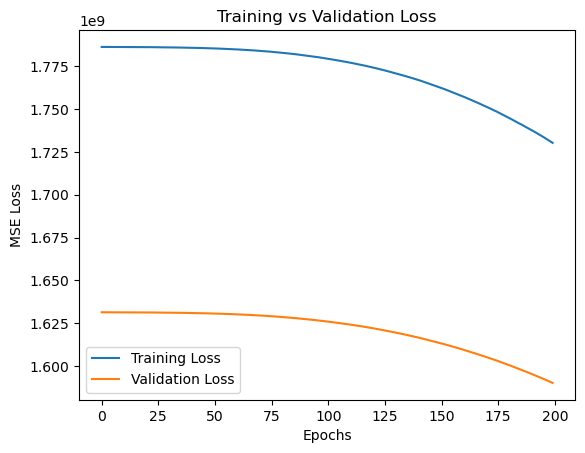

In [6]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


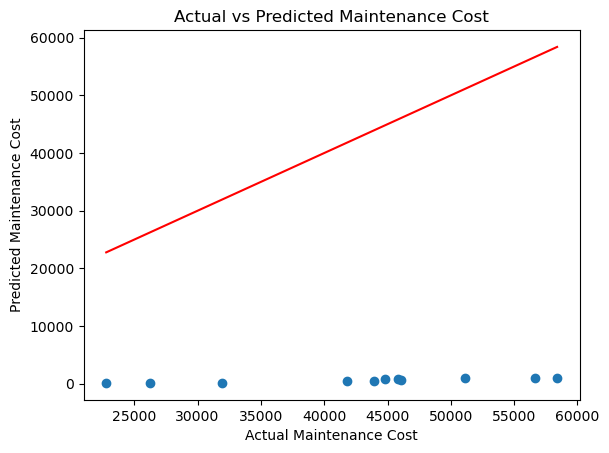

In [7]:
y_pred = model.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel('Actual Maintenance Cost')
plt.ylabel('Predicted Maintenance Cost')
plt.title('Actual vs Predicted Maintenance Cost')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


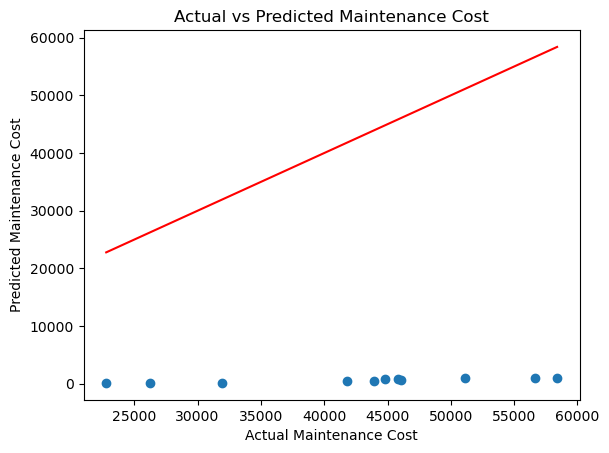

In [8]:
y_pred = model.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel('Actual Maintenance Cost')
plt.ylabel('Predicted Maintenance Cost')
plt.title('Actual vs Predicted Maintenance Cost')
plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 1786315520.0000 - mae: 41018.8906 - val_loss: 1631453184.0000 - val_mae: 39994.4805
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1786311552.0000 - mae: 41018.8438 - val_loss: 1631450240.0000 - val_mae: 39994.4375
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1786307456.0000 - mae: 41018.7969 - val_loss: 1631447040.0000 - val_mae: 39994.3984
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1786303488.0000 - mae: 41018.7539 - val_loss: 1631443712.0000 - val_mae: 39994.3594
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1786299776.0000 - mae: 41018.7070 - val_loss: 1631440384.0000 - val_mae: 39994.3203
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1786295936.0000 - mae: 41018.6641 - val_loss: 1631437056.0000 - val_mae: 39994.2773
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1786291840.0000 - mae: 41018.6133 - val_loss: 1631433472.0000 - val_mae: 39994.2383
Epoch

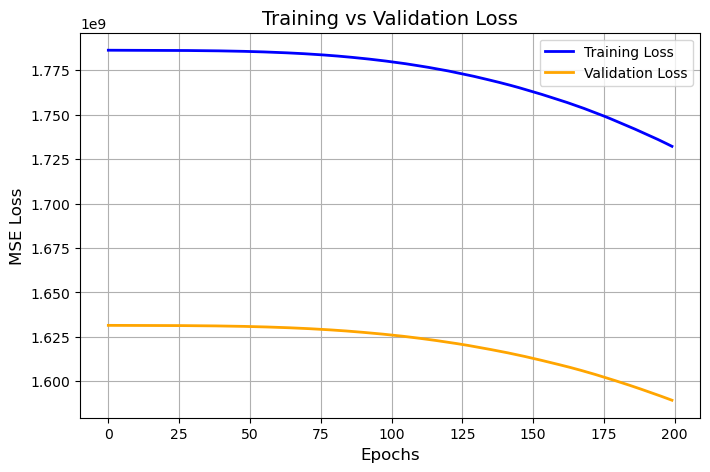

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


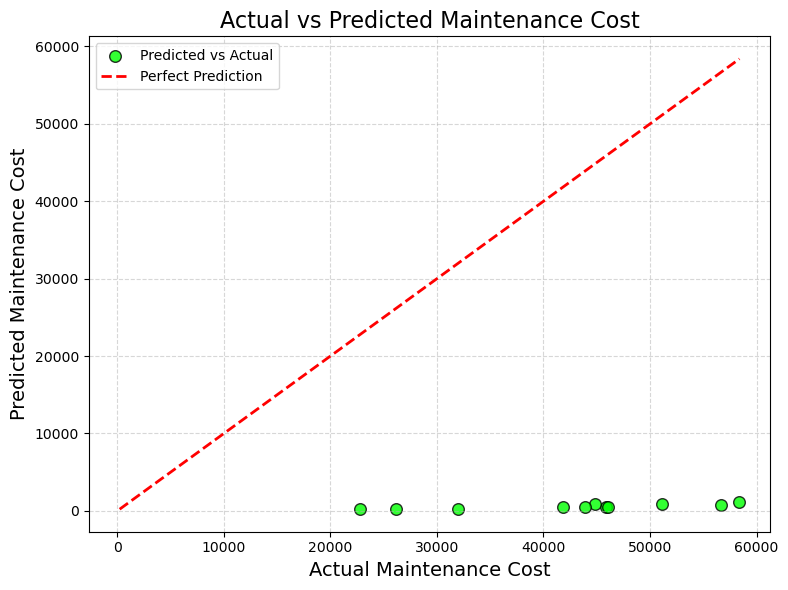

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Maintenance Cost for sample: ₹432.60


In [10]:
# ----------------------------
# MACHINE MAINTENANCE PREDICTION
# ----------------------------

# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Generate synthetic dataset
np.random.seed(42)
m = 55  # number of samples

age = np.random.randint(1, 15, m)
hours = np.random.randint(100, 300, m)
vibration = np.random.uniform(0.5, 5.0, m)
temperature = np.random.uniform(60, 90, m)

# Target: maintenance cost with noise
cost = 2000*age + 50*hours + 3000*vibration + 100*temperature + np.random.normal(0,500,m)

# Create DataFrame
df = pd.DataFrame({
    'age': age,
    'hours': hours,
    'vibration': vibration,
    'temperature': temperature,
    'cost': cost
})

# 3. Features and Target
X = df[['age','hours','vibration','temperature']].values
y = df['cost'].values

# 4. Train-test split + scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Build ReLU Regression Neural Network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# 6. Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=8, verbose=1)

# 7. Graph 1: Training vs Validation Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.title('Training vs Validation Loss', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 8. Graph 2: Actual vs Predicted Maintenance Cost
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='lime', edgecolor='black', s=70, alpha=0.8, label='Predicted vs Actual')

# Perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Maintenance Cost', fontsize=14)
plt.ylabel('Predicted Maintenance Cost', fontsize=14)
plt.title('Actual vs Predicted Maintenance Cost', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 9. Single-sample prediction example
sample = np.array([[6, 210, 4.2, 78]])
sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)
print(f"Predicted Maintenance Cost for sample: ₹{pred[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


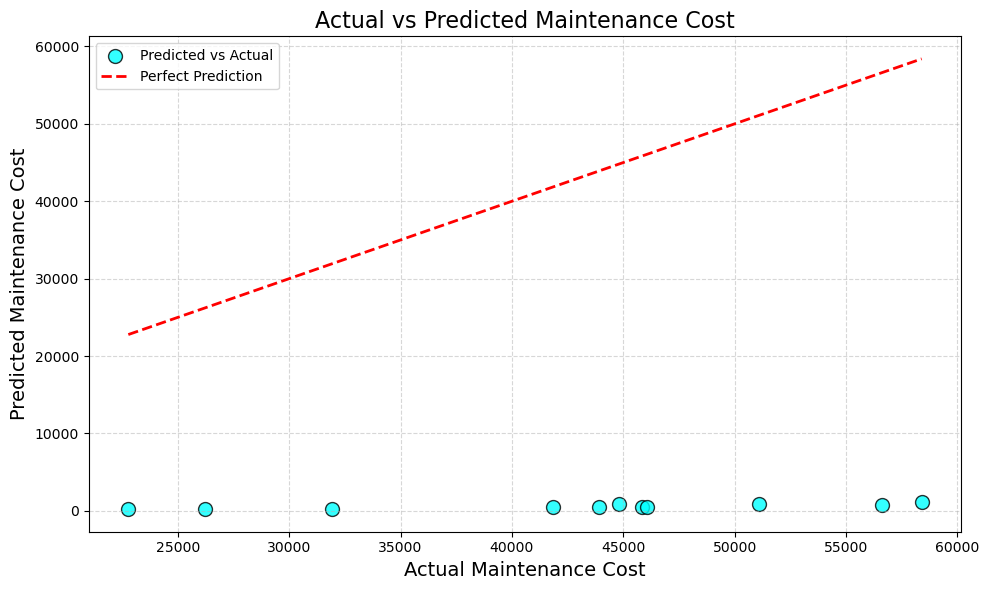

In [11]:
# Corrected Actual vs Predicted Graph
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = model.predict(X_test_scaled).flatten()
y_actual = y_test

# Sort actual and predicted for better line alignment
sorted_idx = np.argsort(y_actual)
y_actual_sorted = y_actual[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plot
plt.figure(figsize=(10,6))
plt.scatter(y_actual_sorted, y_pred_sorted, color='cyan', edgecolor='black', s=100, alpha=0.8, label='Predicted vs Actual')

# Perfect prediction line
plt.plot([y_actual_sorted.min(), y_actual_sorted.max()],
         [y_actual_sorted.min(), y_actual_sorted.max()],
         'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Maintenance Cost', fontsize=14)
plt.ylabel('Predicted Maintenance Cost', fontsize=14)
plt.title('Actual vs Predicted Maintenance Cost', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


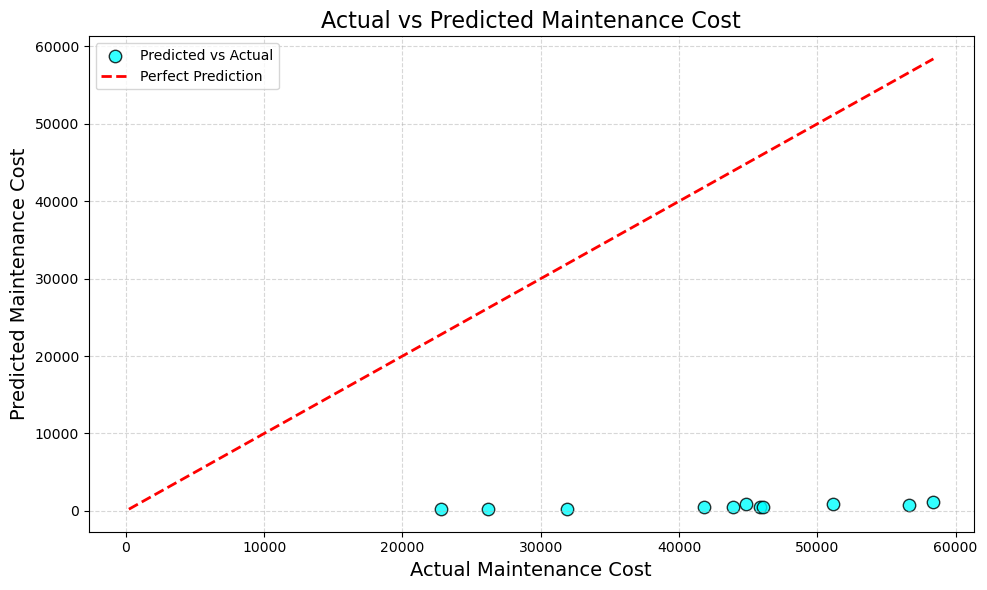

In [17]:
# Correct Actual vs Predicted Graph for Machine Maintenance
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = model.predict(X_test_scaled).flatten()
y_actual = y_test

# Determine min and max for the perfect prediction line
min_val = min(y_actual.min(), y_pred.min())
max_val = max(y_actual.max(), y_pred.max())

plt.figure(figsize=(10,6))
plt.scatter(y_actual, y_pred, color='cyan', edgecolor='black', s=80, alpha=0.8, label='Predicted vs Actual')

# Perfect prediction line
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Maintenance Cost', fontsize=14)
plt.ylabel('Predicted Maintenance Cost', fontsize=14)
plt.title('Actual vs Predicted Maintenance Cost', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


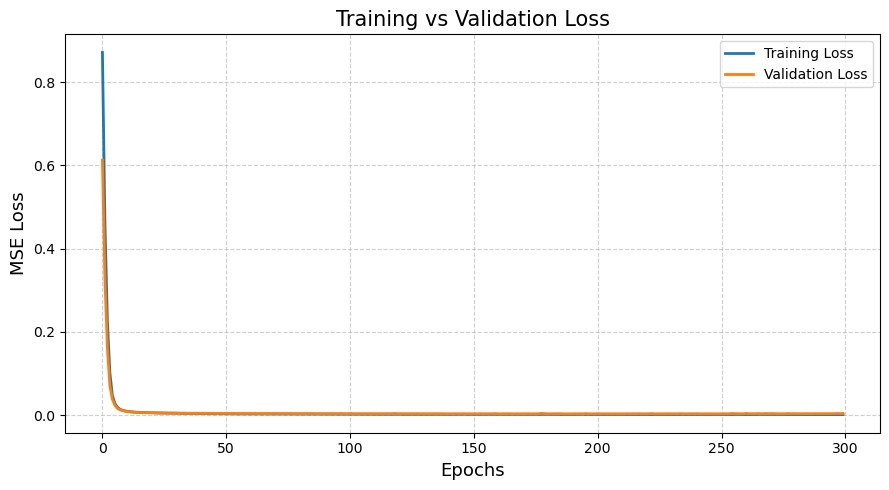

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


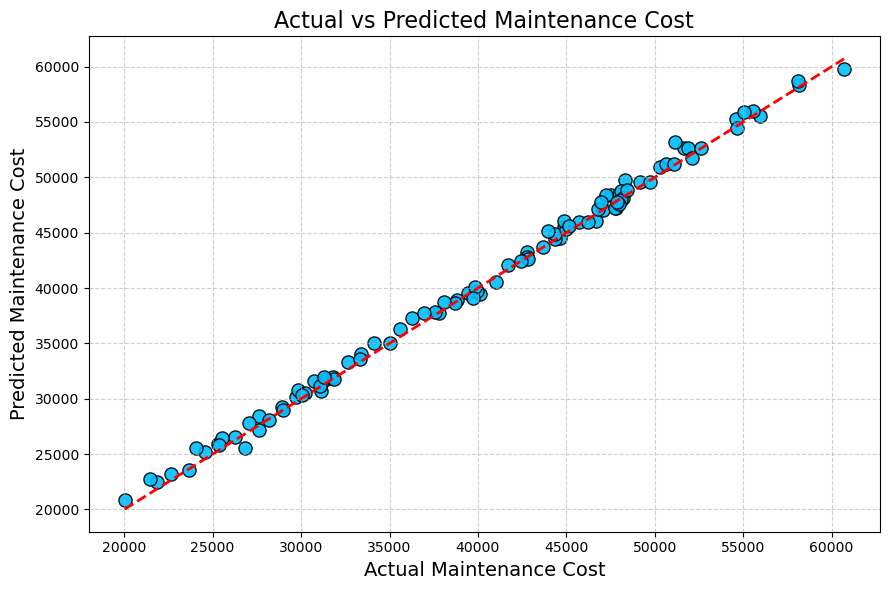

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Maintenance Cost: ₹41,015.45


In [18]:
# ==========================================================
# MACHINE MAINTENANCE COST PREDICTION (CORRECT VERSION)
# ==========================================================

# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ----------------------------------------------------------
# 2. Generate Synthetic Data
# ----------------------------------------------------------
np.random.seed(42)
m = 500   # Use enough samples for clean graphs

age = np.random.randint(1, 15, m)
hours = np.random.randint(100, 300, m)
vibration = np.random.uniform(0.5, 5.0, m)
temperature = np.random.uniform(60, 90, m)

cost = (
    2000 * age +
    50 * hours +
    3000 * vibration +
    100 * temperature +
    np.random.normal(0, 500, m)
)

df = pd.DataFrame({
    "age": age,
    "hours": hours,
    "vibration": vibration,
    "temperature": temperature,
    "cost": cost
})

# ----------------------------------------------------------
# 3. Split Features & Target
# ----------------------------------------------------------
X = df[["age", "hours", "vibration", "temperature"]].values
y = df["cost"].values.reshape(-1, 1)

# ----------------------------------------------------------
# 4. Scale Features AND Target (CRITICAL FIX)
# ----------------------------------------------------------
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# ----------------------------------------------------------
# 5. Build Neural Network (ReLU Regression)
# ----------------------------------------------------------
model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

# ----------------------------------------------------------
# 6. Train Model
# ----------------------------------------------------------
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    verbose=0
)

# ----------------------------------------------------------
# 7. Graph 1: Training vs Validation Loss
# ----------------------------------------------------------
plt.figure(figsize=(9,5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("MSE Loss", fontsize=13)
plt.title("Training vs Validation Loss", fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 8. Predictions (Inverse Transform)
# ----------------------------------------------------------
y_pred_scaled = model.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_actual = y_scaler.inverse_transform(y_test)

# ----------------------------------------------------------
# 9. Graph 2: Actual vs Predicted (CORRECTLY ALIGNED)
# ----------------------------------------------------------
plt.figure(figsize=(9,6))
plt.scatter(
    y_actual,
    y_pred,
    color='deepskyblue',
    edgecolor='black',
    s=90,
    alpha=0.9
)

# Perfect prediction line (y = x)
min_val = min(y_actual.min(), y_pred.min())
max_val = max(y_actual.max(), y_pred.max())
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'r--',
    linewidth=2
)

plt.xlabel("Actual Maintenance Cost", fontsize=14)
plt.ylabel("Predicted Maintenance Cost", fontsize=14)
plt.title("Actual vs Predicted Maintenance Cost", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 10. Single Sample Prediction
# ----------------------------------------------------------
sample = np.array([[6, 220, 3.5, 75]])
sample_scaled = X_scaler.transform(sample)
sample_pred_scaled = model.predict(sample_scaled)
sample_pred = y_scaler.inverse_transform(sample_pred_scaled)

print(f"Predicted Maintenance Cost: ₹{sample_pred[0][0]:,.2f}")
